In [1]:
# OLTP: Online Transactional Processing
# OLAP: Online Analytical Processing(Data Warehouse)
# ETL: Extract Transform Load

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_booking = pd.read_csv("D:/Python/Hospitality/fact_bookings.csv")
df_date = pd.read_csv("D:/Python/Hospitality/dim_date.csv")
df_hotel = pd.read_csv("D:/Python/Hospitality/dim_hotels.csv")
df_room = pd.read_csv("D:/Python/Hospitality/dim_rooms.csv")
df_aggr_bookings = pd.read_csv("D:/Python/Hospitality/fact_aggregated_bookings.csv")
df_august= pd.read_csv("D:/Python/Hospitality/new_data_august.csv")


In [4]:
df_booking.shape

(134590, 12)

In [5]:
df_booking.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [6]:
df_booking.tail(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
134585,Jul312217564RT46,17564,29-07-2022,31-07-2022,03-08-2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-2022,31-07-2022,02-08-2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-2022,31-07-2022,01-08-2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300
134589,Jul312217564RT410,17564,31-07-2022,31-07-2022,01-08-2022,2.0,RT4,makeyourtrip,NaN,Cancelled,32300,12920


In [7]:
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [8]:
df_booking.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [9]:
df_booking.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

In [10]:
print(df_booking.revenue_generated.min(),df_booking.revenue_generated.max())

6500 28560000


In [11]:
df_booking.revenue_generated.describe()

count    1.345900e+05
mean     1.537805e+04
std      9.303604e+04
min      6.500000e+03
25%      9.900000e+03
50%      1.350000e+04
75%      1.800000e+04
max      2.856000e+07
Name: revenue_generated, dtype: float64

In [12]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


<Axes: xlabel='booking_platform'>

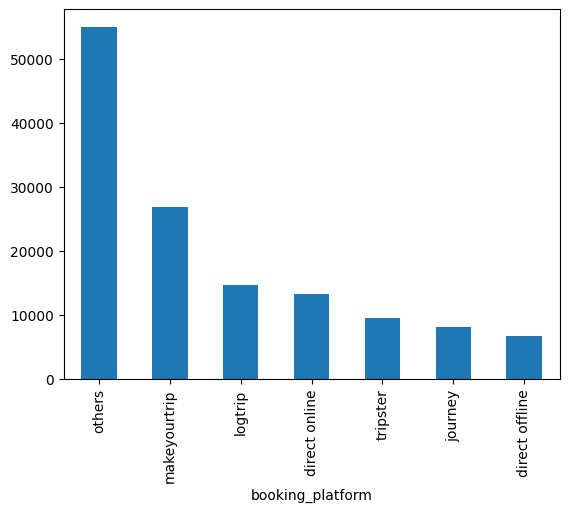

In [13]:
df_booking.booking_platform.value_counts().plot(kind='bar')


<Axes: ylabel='booking_platform'>

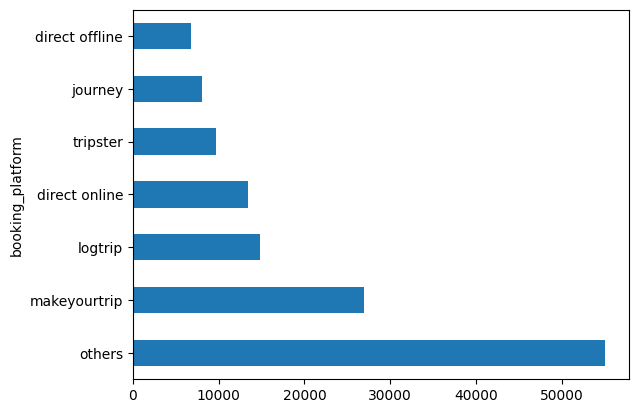

In [14]:
df_booking.booking_platform.value_counts().plot(kind='barh')

### Finding out the unique property ids in aggregate booking dataset

In [15]:
df_aggr_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30.0
1,19562,01-May-22,RT1,28,30.0
2,19563,01-May-22,RT1,23,30.0
3,17558,01-May-22,RT1,30,19.0
4,16558,01-May-22,RT1,18,19.0


In [16]:
df_aggr_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

## Find out total booking per Property_id

In [17]:
total_bookings=df_aggr_bookings.groupby('property_id').size().reset_index(name='successful_bookings')
print(total_bookings)

    property_id  successful_bookings
0         16558                  368
1         16559                  368
2         16560                  368
3         16561                  368
4         16562                  368
5         16563                  368
6         17558                  368
7         17559                  368
8         17560                  368
9         17561                  368
10        17562                  368
11        17563                  368
12        17564                  368
13        18558                  368
14        18559                  368
15        18560                  368
16        18561                  368
17        18562                  368
18        18563                  368
19        19558                  368
20        19559                  368
21        19560                  368
22        19561                  368
23        19562                  368
24        19563                  368


## Find out days when booking is greater then capacity

In [18]:
df_aggr_bookings.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30.0
1,19562,01-May-22,RT1,28,30.0


In [19]:
Highest_capacity_booking= df_aggr_bookings[df_aggr_bookings['successful_bookings'] > df_aggr_bookings['capacity']]
print(Highest_capacity_booking)

      property_id check_in_date room_category  successful_bookings  capacity
3           17558     01-May-22           RT1                   30      19.0
12          16563     01-May-22           RT1                  100      41.0
4136        19558     11-Jun-22           RT2                   50      39.0
6209        19560     02-Jul-22           RT1                  123      26.0
8522        19559     25-Jul-22           RT1                   35      24.0
9194        18563     31-Jul-22           RT4                   20      18.0


In [20]:
## Find out properties that have highest capacity

In [21]:
max_capacity=df_aggr_bookings.capacity.max()
print(max_capacity)



50.0


In [22]:
highest_capacity=df_aggr_bookings[df_aggr_bookings['capacity'] == max_capacity]
print(highest_capacity)

      property_id check_in_date room_category  successful_bookings  capacity
27          17558     01-May-22           RT2                   38      50.0
128         17558     02-May-22           RT2                   27      50.0
229         17558     03-May-22           RT2                   26      50.0
328         17558     04-May-22           RT2                   27      50.0
428         17558     05-May-22           RT2                   29      50.0
...           ...           ...           ...                  ...       ...
8728        17558     27-Jul-22           RT2                   22      50.0
8828        17558     28-Jul-22           RT2                   21      50.0
8928        17558     29-Jul-22           RT2                   23      50.0
9028        17558     30-Jul-22           RT2                   32      50.0
9128        17558     31-Jul-22           RT2                   30      50.0

[92 rows x 5 columns]


## Data Cleaning

In [23]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [24]:
df_booking.shape

(134590, 12)

In [25]:
df_booking[df_booking['no_guests']<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12-05-2022,12-05-2022,14-05-2022,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,08-05-2022,12-05-2022,14-05-2022,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,05-05-2022,12-05-2022,17-05-2022,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10-05-2022,12-05-2022,17-05-2022,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,05-06-2022,08-06-2022,13-06-2022,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-2022,20-07-2022,22-07-2022,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [26]:
df_booking=df_booking[df_booking['no_guests']>0]
df_booking.shape

(134578, 12)

In [27]:
df_booking.revenue_generated.min(),df_booking.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [28]:
# To remove outlier we can use mean, median , standard deviation
avg , std = df_booking['revenue_generated'].mean(),df_booking['revenue_generated'].std()
avg , std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [29]:
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

In [30]:
lower_limit = avg - 3*std
lower_limit

np.float64(-263742.4278567056)

In [31]:
# This are Outlier
df_booking[df_booking.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-2022,01-05-2022,02-05-2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-2022,01-05-2022,04-05-2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-2022,28-07-2022,29-07-2022,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [32]:
df_booking=df_booking[df_booking.revenue_generated<higher_limit]
df_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-2022,01-05-2022,03-05-2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-2022,31-07-2022,01-08-2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-2022,31-07-2022,03-08-2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-2022,31-07-2022,02-08-2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-2022,31-07-2022,01-08-2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [33]:
df_booking.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [34]:
higher_limit_revenue_realize= df_booking.revenue_realized.mean() + 3*df_booking.revenue_realized.std()
higher_limit_revenue_realize


np.float64(33479.358661845814)

In [35]:
df_booking[df_booking.revenue_realized>higher_limit_revenue_realize]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-2022,01-05-2022,07-05-2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,01-05-2022,01-05-2022,02-05-2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-2022,01-05-2022,03-05-2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-2022,01-05-2022,07-05-2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-2022,01-05-2022,03-05-2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-2022,31-07-2022,02-08-2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-2022,31-07-2022,01-08-2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-2022,31-07-2022,01-08-2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-2022,31-07-2022,06-08-2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [36]:
df_room

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [37]:
df_booking[df_booking.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [38]:
H_L_room_category = 23439 + 3*9048
H_L_room_category

50583

If revenue realized is greater then 50583 then it is considered as outlier but in dataset the Max is 45220 mean there is no outlier

## Data Transformation

In [39]:
df_aggr_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30.0
1,19562,01-May-22,RT1,28,30.0
2,19563,01-May-22,RT1,23,30.0
3,17558,01-May-22,RT1,30,19.0
4,16558,01-May-22,RT1,18,19.0


In [40]:
df_aggr_bookings['occ_pct']=df_aggr_bookings['successful_bookings']/df_aggr_bookings['capacity']
df_aggr_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30.0,0.833333
1,19562,01-May-22,RT1,28,30.0,0.933333
2,19563,01-May-22,RT1,23,30.0,0.766667
3,17558,01-May-22,RT1,30,19.0,1.578947
4,16558,01-May-22,RT1,18,19.0,0.947368
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [41]:
df_aggr_bookings['occ_pct']=df_aggr_bookings['occ_pct'].apply(lambda x: round(x*100,2))
df_aggr_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30.0,83.33
1,19562,01-May-22,RT1,28,30.0,93.33
2,19563,01-May-22,RT1,23,30.0,76.67
3,17558,01-May-22,RT1,30,19.0,157.89
4,16558,01-May-22,RT1,18,19.0,94.74


In [42]:
df_aggr_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [43]:
df=pd.merge(df_aggr_bookings,df_room,left_on='room_category',right_on='room_id',how='left')

In [44]:
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,01-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,01-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,01-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,01-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,01-May-22,RT1,18,19.0,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [45]:
df.groupby('room_class')['occ_pct'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [46]:
df.drop('room_id',axis=1,inplace=True)
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,01-May-22,RT1,25,30.0,83.33,Standard
1,19562,01-May-22,RT1,28,30.0,93.33,Standard
2,19563,01-May-22,RT1,23,30.0,76.67,Standard
3,17558,01-May-22,RT1,30,19.0,157.89,Standard
4,16558,01-May-22,RT1,18,19.0,94.74,Standard
...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential


In [47]:
df_hotel.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [48]:
df=pd.merge(df,df_hotel,on='property_id',how='left')
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,01-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,01-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,01-May-22,RT1,30,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai
4,16558,01-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi


In [49]:
df.groupby('city')['occ_pct'].mean()

city
Bangalore    56.594207
Delhi        61.606467
Hyderabad    58.144651
Mumbai       57.936305
Name: occ_pct, dtype: float64

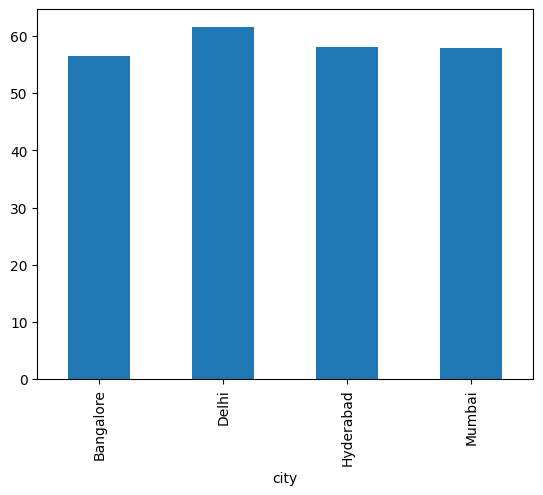

In [50]:
df.groupby('city')['occ_pct'].mean().plot(kind='bar')
plt.show()

In [51]:
df=pd.merge(df,df_date,left_on='check_in_date',right_on='date',how='left')
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,01-May-22,May-22,W 19,weekend
1,19562,01-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore,01-May-22,May-22,W 19,weekend
2,19563,01-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,01-May-22,May-22,W 19,weekend
3,17558,01-May-22,RT1,30,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai,01-May-22,May-22,W 19,weekend
4,16558,01-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi,01-May-22,May-22,W 19,weekend


In [52]:
df.groupby('day_type')['occ_pct'].mean().round(2)

day_type
weekeday    51.82
weekend     74.24
Name: occ_pct, dtype: float64

In [53]:
df['mmm yy'].unique()

array(['May-22', 'Jun-22', 'Jul-22'], dtype=object)

In [54]:
df_jun_22=df[df['mmm yy']=='Jun-22']
df_jun_22.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
3100,16559,01-Jun-22,RT1,14,30.0,46.67,Standard,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun-22,W 23,weekeday
3101,18560,01-Jun-22,RT1,18,30.0,60.00,Standard,Atliq City,Business,Hyderabad,01-Jun-22,Jun-22,W 23,weekeday
3102,19562,01-Jun-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,01-Jun-22,Jun-22,W 23,weekeday


In [55]:
df_jun_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.95
Name: occ_pct, dtype: float64

In [56]:
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [57]:
# concanate function to join to different table in one new dataframe
latest_df = pd.concat([df, df_august],ignore_index=True, axis=0)
latest_df.tail(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
9204,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
9205,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
9206,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [58]:
df_booking.head(3)


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [59]:
df_booking_all=pd.merge(df_booking,df_hotel,on='property_id',how='left')

In [60]:
df_booking_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [61]:
df_booking_all.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

In [62]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [63]:
df_booking_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [64]:
df_date['date']=pd.to_datetime(df_date['date'])


C:\Users\Dishitha\AppData\Local\Temp\ipykernel_2836\3836171720.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date']=pd.to_datetime(df_date['date'])


In [66]:
df_booking_all['check_in_date'] = pd.to_datetime(df_booking_all['check_in_date'], dayfirst=True)

In [67]:
df_booking_all=pd.merge(df_booking_all,df_date,left_on='check_in_date',right_on='date',how='left')

In [68]:
df_booking_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-2022,2022-05-01,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May-22,W 19,weekend
1,May012216558RT15,16558,27-04-2022,2022-05-01,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May-22,W 19,weekend
2,May012216558RT16,16558,01-05-2022,2022-05-01,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May-22,W 19,weekend


In [69]:
df_booking_all.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul-22    572843348
Jun-22    553925855
May-22    581767396
Name: revenue_realized, dtype: int64